# :rocket:Kerbal Space Program - kRPC mod

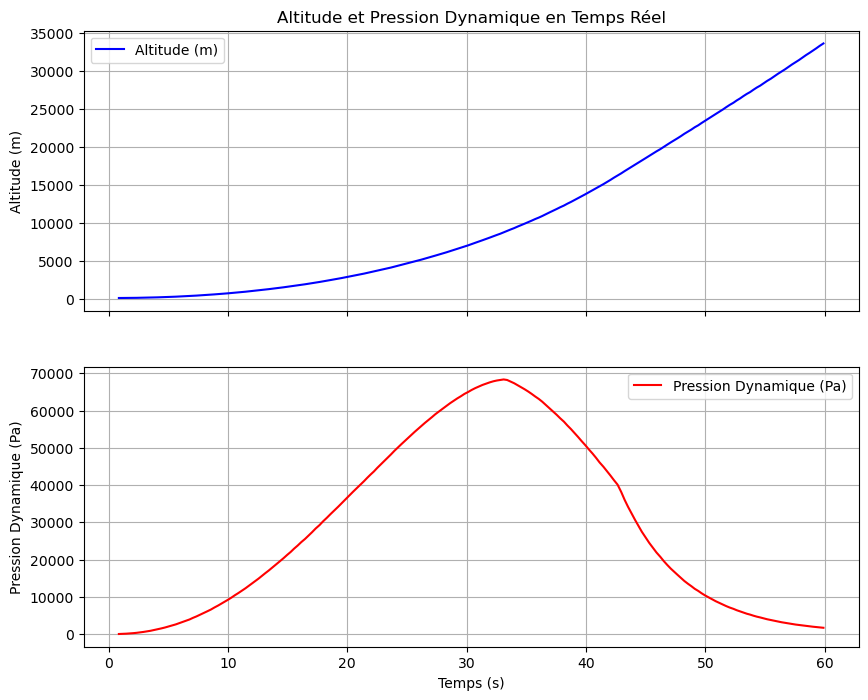

Données enregistrées dans 'altitude_dynamic_pressure_log.csv'.
      Time (s)  Altitude (m)  Dynamic Pressure (Pa)
0     0.859535     80.212102              17.708530
1     1.177183     82.718306              52.937889
2     1.472844     86.269548             103.556198
3     1.770092     90.294511             161.375366
4     2.064261     96.038263             244.415695
..         ...           ...                    ...
196  58.735206  32366.728066            2071.428955
197  59.015118  32663.432099            1971.381226
198  59.295457  32960.685843            1876.302490
199  59.577006  33279.785312            1779.347046
200  59.892379  33599.522722            1686.839966

[201 rows x 3 columns]


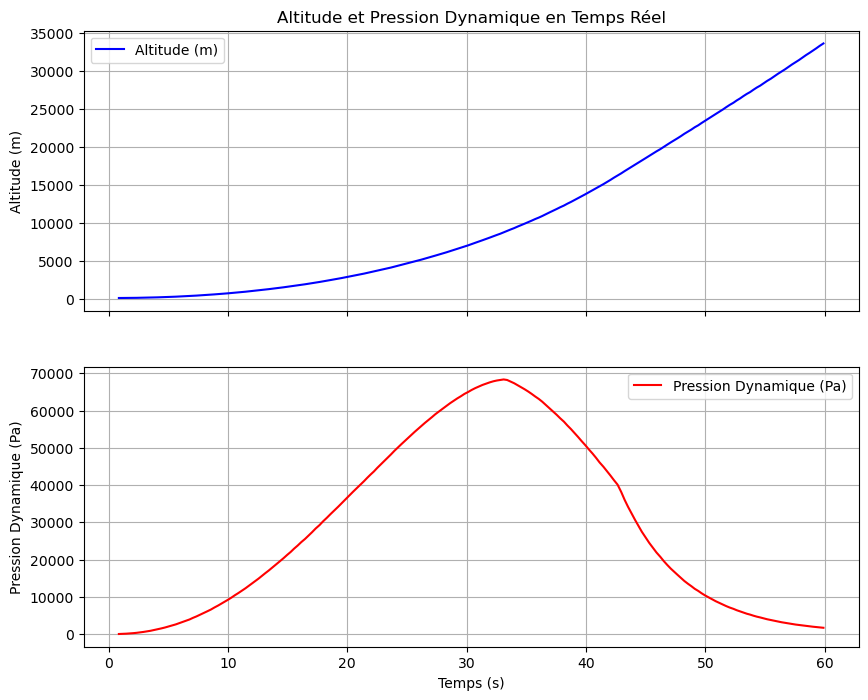

In [ ]:
import krpc
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Connexion au serveur kRPC
conn = krpc.connect(name='Altitude and Dynamic Pressure Logger')
vessel = conn.space_center.active_vessel

# Initialisation des listes pour stocker les données
time_data = []
altitude_data = []
dynamic_pressure_data = []

# Durée d'enregistrement (en secondes)
duration = 60  # Par exemple, 60 secondes
start_time = time.time()

# Configuration du graphique
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Graphique pour l'altitude
line_altitude, = ax[0].plot([], [], label='Altitude (m)', color='blue')
ax[0].set_ylabel('Altitude (m)')
ax[0].set_title('Altitude et Pression Dynamique en Temps Réel')
ax[0].legend()
ax[0].grid()

# Graphique pour la pression dynamique
line_dyn_pressure, = ax[1].plot([], [], label='Pression Dynamique (Pa)', color='red')
ax[1].set_xlabel('Temps (s)')
ax[1].set_ylabel('Pression Dynamique (Pa)')
ax[1].legend()
ax[1].grid()

# Afficher le graphique initialement (important dans Jupyter)
display(fig)

vessel.control.throttle = 1
vessel.control.sas = True
vessel.control.activate_next_stage()

print("Enregistrement des données avec tracé en temps réel...")
while time.time() - start_time < duration:
    # Temps écoulé
    elapsed_time = time.time() - start_time

    # Altitude actuelle
    altitude = vessel.flight().mean_altitude

    # Pression dynamique
    dynamic_pressure = vessel.flight().dynamic_pressure

    # Ajouter les données aux listes
    time_data.append(elapsed_time)
    altitude_data.append(altitude)
    dynamic_pressure_data.append(dynamic_pressure)

    # Mettre à jour les données du graphique
    line_altitude.set_xdata(time_data)
    line_altitude.set_ydata(altitude_data)
    line_dyn_pressure.set_xdata(time_data)
    line_dyn_pressure.set_ydata(dynamic_pressure_data)

    for axis in ax:
        axis.relim()  # Réajuste les limites
        axis.autoscale_view()

    # Mettre à jour le graphe dans Jupyter
    clear_output(wait=True)  # Supprime l'affichage précédent
    display(fig)  # Réaffiche le graphe mis à jour

    # Pause pour éviter une surcharge CPU
    time.sleep(0.1)

# Sauvegarder les données dans un fichier CSV
df = pd.DataFrame({
    'Time (s)': time_data,
    'Altitude (m)': altitude_data,
    'Dynamic Pressure (Pa)': dynamic_pressure_data
})
# df.to_csv('altitude_dynamic_pressure_log.csv', index=False)

# print("Données enregistrées dans 'altitude_dynamic_pressure_log.csv'.")
# print(df)
